In [3]:
from sklearn.datasets import  load_iris
from sklearn.manifold import MDS, TSNE
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
import matplotlib.cm as cm
%matplotlib inline

In [8]:
iris = load_iris()

In [6]:
def plot_data(data, labels):
    plt.figure(figsize=(12,9))
    plt.scatter(data[:,0], data[:,1], c=["w" for _ in labels])
    for d, l in zip(data,labels):
        plt.text(d[0], d[1], str(l), fontdict={"size":12, "color":cm.Paired(l)})

def pca(vectors):
    pca = PCA(n_components=2)
    return pca.fit_transform(vectors)
def mds(vectors):
    mds = MDS(n_jobs=4)
    if(vectors.shape[1] > 15):
        vectors = PCA(n_components=15).fit_transform(vectors)
    return mds.fit_transform(vectors)
def nmds(vectors):
    nmds = MDS(metric=False, n_jobs=4)
    if(vectors.shape[1] > 15):
        vectors = PCA(n_components=15).fit_transform(vectors)
    return nmds.fit_transform(vectors)
def tsne(vectors):
    tsne = TSNE()
    if(vectors.shape[1] > 15):
        vectors = PCA(n_components=15).fit_transform(vectors)
    return tsne.fit_transform(vectors)


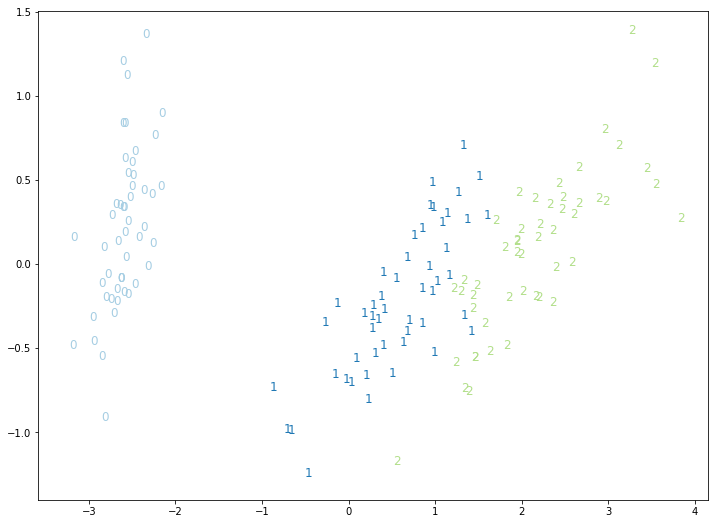

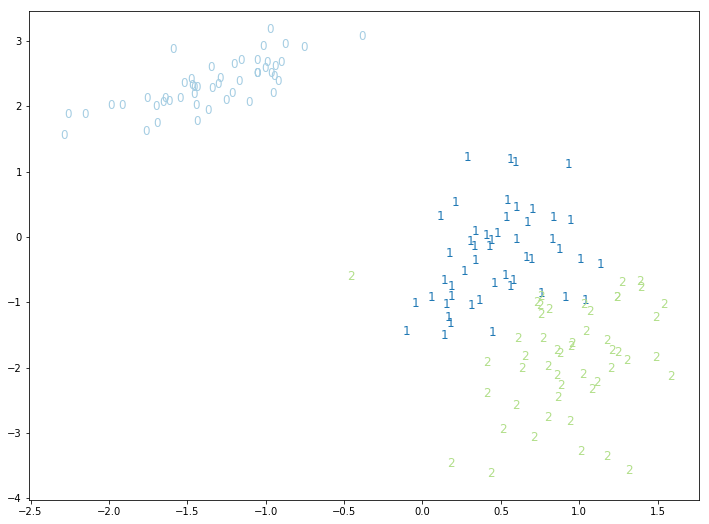

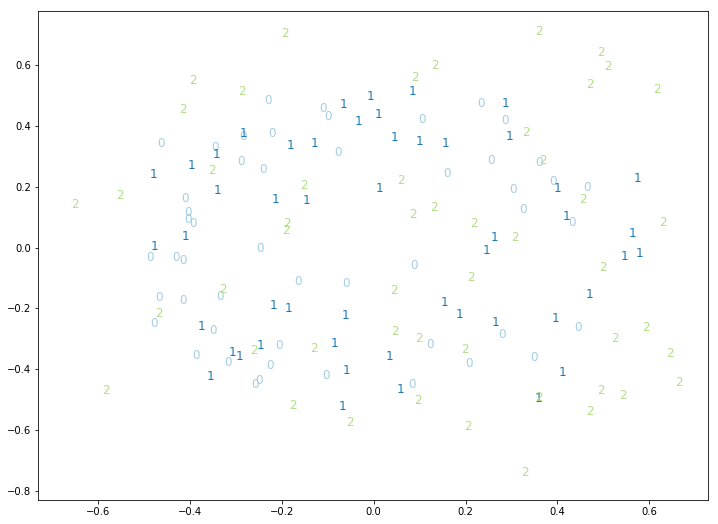

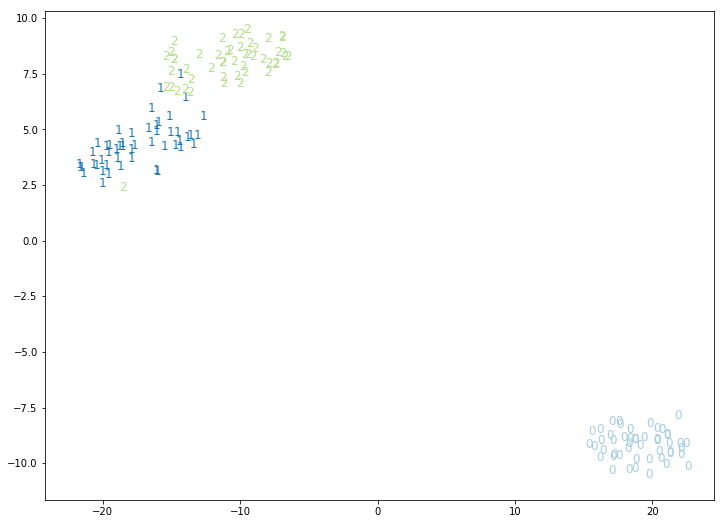

In [13]:
plot_data(pca(iris["data"]), iris["target"])
plot_data(mds(iris["data"]), iris["target"])
plot_data(nmds(iris["data"]), iris["target"])
plot_data(tsne(iris["data"]), iris["target"])

In [14]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=3, max_iter=30, init="random", n_jobs=-1)

In [16]:
cluster = kmeans.fit_predict(iris["data"])

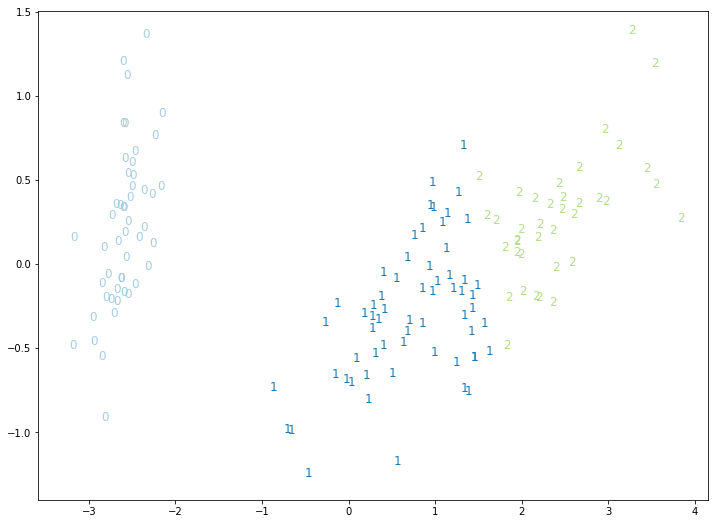

In [21]:
plot_data(pca(iris["data"]), cluster)